In [2]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,BatchNormalization,MaxPooling2D,Flatten,GlobalAveragePooling2D,GlobalMaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

In [3]:
import os
import cv2

In [4]:
dataDir=("brain tumor dataset\Training")
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path=os.path.join(dataDir,i)
    for imag in os.listdir(path):
        image_arr=cv2.imread(os.path.join(path,imag))
        break
    break

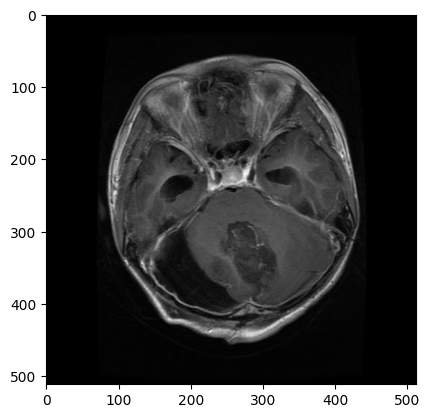

In [5]:
import matplotlib.pyplot as plt
plt.imshow(image_arr)


In [6]:
image_arr.shape

(512, 512, 3)

In [7]:
model =Sequential()
model.add(Conv2D(64,(7,7),activation="relu",input_shape=(128,128,1),padding="same",kernel_initializer="uniform"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(512,(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(7,7),activation="relu",padding="same"))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(4,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy",keras.metrics.Precision(),
                             keras.metrics.Recall(),
                             keras.metrics.SpecificityAtSensitivity(0.5),
                             keras.metrics.SensitivityAtSpecificity(0.5)])




In [8]:
genertor_train=ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization= False,
    samplewise_std_normalization = False,
    zca_whitening=False,
    zca_epsilon = 0.000001,
    rotation_range = 0,
    width_shift_range= 0,
    height_shift_range= 0,
    brightness_range= None,
    shear_range = 0,
    zoom_range = 0,
    rescale=1./255,
   validation_split=0.15,
)
genertor_test=ImageDataGenerator(rescale=1./255,)

train=genertor_train.flow_from_directory("brain tumor dataset\Training",
    target_size=(128,128),color_mode="grayscale",subset="training",batch_size=32,class_mode="categorical")

val=genertor_train.flow_from_directory("brain tumor dataset\Training",target_size=(128,128),color_mode="grayscale",subset="validation",batch_size=32,class_mode="categorical")
test=genertor_test.flow_from_directory("brain tumor dataset\Testing",target_size=(128,128),batch_size=32,color_mode="grayscale",class_mode="categorical")


Found 5368 images belonging to 4 classes.
Found 945 images belonging to 4 classes.
Found 720 images belonging to 4 classes.


In [9]:
for i in range(5):
    print(test[i][1][1].tolist())

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


In [10]:
model1_es = EarlyStopping(monitor = 'val_loss', min_delta = 1e-11, patience = 7, verbose = 1)
model1_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 5, min_lr=0.00001,verbose = 1)


model1_mcp = ModelCheckpoint(filepath = 'model_2_brain_CNN.keras', monitor = 'val_accuracy',
                      save_best_only = True, verbose = 1)


In [11]:
history1 = model.fit(train, epochs=70, validation_data=val,batch_size=64,
                     callbacks=[model1_es, model1_rlr, model1_mcp])

Epoch 1/70
168/168 [==============================] - ETA: 0s - loss: 0.7724 - accuracy: 0.7111 - precision: 0.7608 - recall: 0.6451 - specificity_at_sensitivity: 0.9653 - sensitivity_at_specificity: 0.9659
Epoch 1: val_accuracy improved from -inf to 0.36296, saving model to model_2_brain_CNN.keras
168/168 [==============================] - 265s 1s/step - loss: 0.7724 - accuracy: 0.7111 - precision: 0.7608 - recall: 0.6451 - specificity_at_sensitivity: 0.9653 - sensitivity_at_specificity: 0.9659 - val_loss: 1.3355 - val_accuracy: 0.3630 - val_precision: 0.4418 - val_recall: 0.2730 - val_specificity_at_sensitivity: 0.7182 - val_sensitivity_at_specificity: 0.7302 - lr: 0.0010
Epoch 2/70
168/168 [==============================] - ETA: 0s - loss: 0.5112 - accuracy: 0.8154 - precision: 0.8376 - recall: 0.7871 - specificity_at_sensitivity: 0.9886 - sensitivity_at_specificity: 0.9905
Epoch 2: val_accuracy improved from 0.36296 to 0.43386, saving model to model_2_brain_CNN.keras
168/168 [=====

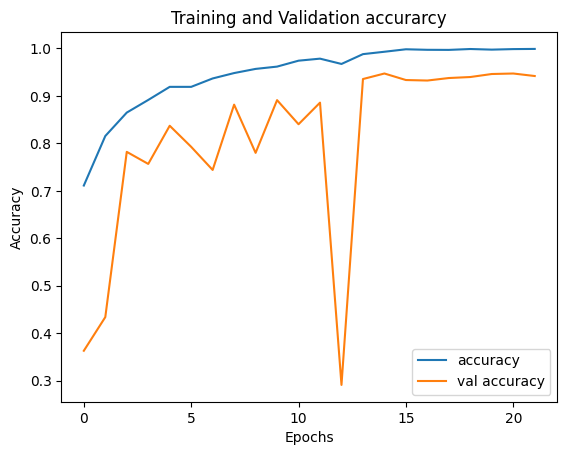

In [12]:
import matplotlib.pyplot as plt
plt.plot(history1.history["accuracy"],label="accuracy")
plt.plot(history1.history["val_accuracy"],label="val accuracy")
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



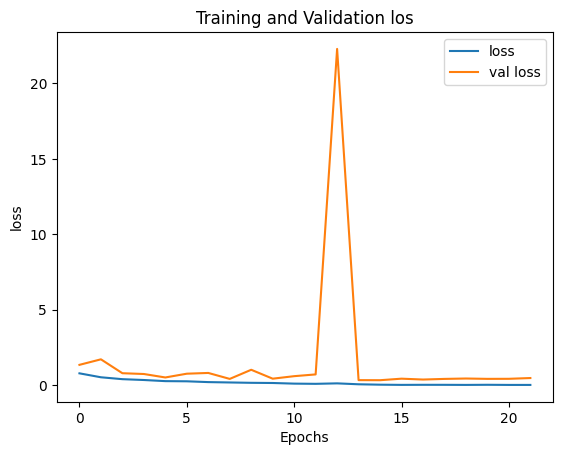

In [13]:
plt.plot(history1.history["loss"],label="loss")
plt.plot(history1.history["val_loss"],label="val loss")
plt.title('Training and Validation los')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

In [14]:

from tensorflow import keras
model1 = keras.models.load_model('model_2_brain_CNN.keras')

model.evaluate(test)

23/23 [==============================] - 19s 821ms/step - loss: 0.0757 - accuracy: 0.9833 - precision: 0.9847 - recall: 0.9833 - specificity_at_sensitivity: 0.9981 - sensitivity_at_specificity: 0.9944


[0.07565971463918686,
 0.9833333492279053,
 0.9847009778022766,
 0.9833333492279053,
 0.9981481432914734,
 0.9944444298744202]

In [18]:
from tqdm import tqdm
import numpy as np
y_test = []
y_test_int = []
for i in tqdm(range(len(test))):
    y_test += test[i][1].tolist()
    y_test_int += test[i][1].argmax(axis=1).tolist()

y_test = np.array(y_test)
y_test_int = np.array(y_test_int)

  0%|          | 0/23 [00:00<?, ?it/s]

100%|██████████| 23/23 [00:06<00:00,  3.75it/s]


23/23 [==============================] - 3s 146ms/step
Accuracy is:  0.9833333333333333
              precision    recall  f1-score   support

      glioma     0.9943    0.9667    0.9803       180
  meningioma     0.9615    0.9722    0.9669       180
     notumor     0.9890    1.0000    0.9945       180
   pituitary     0.9890    0.9944    0.9917       180

    accuracy                         0.9833       720
   macro avg     0.9834    0.9833    0.9833       720
weighted avg     0.9834    0.9833    0.9833       720



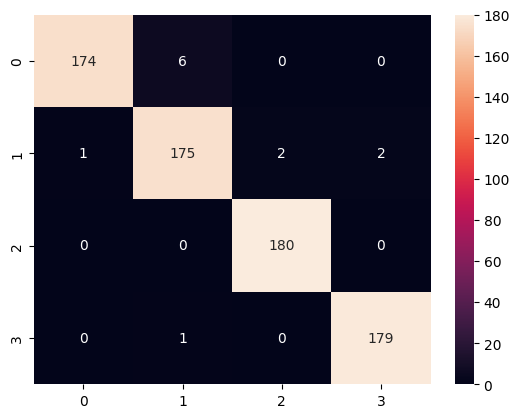

In [19]:
target_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import numpy as np
import seaborn as sn
import pandas as pd
y_pred=model.predict(test)
y_pred_int=np.argmax(y_pred,axis=1)

ac = accuracy_score(y_test_int, y_pred_int)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test_int, y_pred_int)
sn.heatmap(cm,annot=True,fmt="d")
print(classification_report(y_test_int, y_pred_int, target_names=target_names, digits=4))


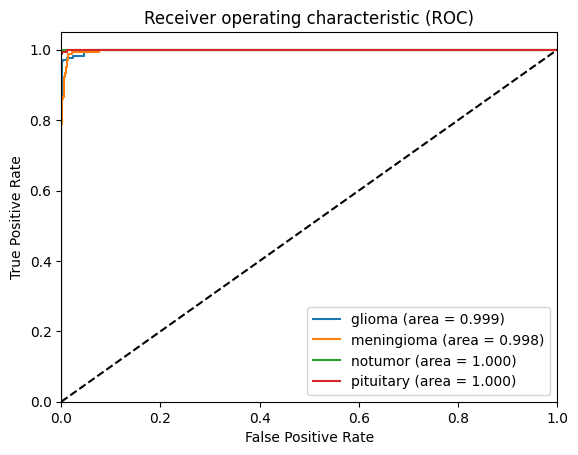

In [20]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
classes=['glioma', 'meningioma', 'notumor', 'pituitary']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='{} (area = {:0.3f})'.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [22]:
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

img_path = 'brain tumor dataset/Testing/glioma/Te-gl_0030.jpg'  
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 128))
img = image.img_to_array(img)
img = img / 255.0  
img = np.expand_dims(img, axis=0)  
prediction = model.predict(img)

predicted_class = np.argmax(prediction)

print("Predicted class:", predicted_class)

1/1 [==============================] - 2s 2s/step
Predicted class: 0
